# NLP Classification

In [3]:
import json
import random
with open("imdb_train.json") as f:
    data=json.load(f)
random.shuffle(data) 
print("class label:", data[0]["class"])
print("text:",data[0]["text"])

class label: pos
text: This movie is one of those \WOW!\" movies. Not because it's the greatest movie of all time, but because it surprised me. Not only was it a T.V. movie, but it was on Elvis. I can safely say as many impersonators as there are there was only one Elvis, but I can also safely say that Kurt Russel came extremely close to being the real thing. It was one of the greatest impersonations that I have ever seen. He had me believing that it was really him. I learned a lot about Elvis' life from watching this movie. And don't led the television part of it let you stray-it's actually a really fantastic film! And Kurt Russel could've been Elvis' twin :)"


In [4]:
## labeling all the text datas
texts=[one_example["text"] for one_example in data]
labels=[one_example["class"] for one_example in data]
print("This many texts",len(texts))
print("This many labels",len(labels))
print()
for label,text in list(zip(labels,texts))[:20]:
    print(label,text[:50]+"...")

This many texts 25000
This many labels 25000

pos This movie is one of those \WOW!\" movies. Not bec...
neg Ludicrous. Angelic 9-year-old Annakin turns into w...
neg Model Chris McCormack (Margaux Hemingway) is bruta...
pos Having read many of the other reviews for this fil...
pos If ever I was asked to remember a song from a film...
neg This movie makes a promising start and then gets v...
pos Loopy, but shrewd and formidable mob boss Vic (an ...
pos Directed by the duo Yudai Yamaguchi (Battlefield B...
neg First of all, I'd like to say that I love the \Lad...
pos Curl up with this one on a dark and stormy night a...
neg Here are the matches . . . (adv. = advantage)  The...
neg I chuckled a few times during this movie. I laughe...
pos Yeah sure it's cheesy, it's not Zombie, but it's n...
pos Clark Gable plays a con man who busts into the lif...
pos This is definitely one of the greatest Disney movi...
pos When an actor has to play the role of an actor, fi...
pos The year 1995, when so

In [5]:
## feature extraction with tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(texts)
print("shape=",feature_matrix.shape)
print("what did we get? ->", feature_matrix.__class__)

shape= (25000, 74849)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [6]:
print(feature_matrix)

  (0, 68736)	0.20594520898524926
  (0, 6543)	0.07424773758242767
  (0, 70920)	0.09083389181388886
  (0, 15056)	0.07771300349400224
  (0, 24536)	0.05061489677953058
  (0, 23766)	0.14554250915048061
  (0, 1670)	0.09530342747196267
  (0, 63548)	0.24687942517117256
  (0, 74324)	0.05133805217312917
  (0, 38466)	0.11243259385672208
  (0, 48525)	0.09786208886993593
  (0, 65937)	0.14474796856037733
  (0, 38180)	0.17173760309195316
  (0, 19563)	0.07506961284287783
  (0, 3258)	0.033043400534576224
  (0, 72259)	0.0918919620061617
  (0, 26180)	0.05617288040649016
  (0, 38683)	0.08592275570938178
  (0, 1277)	0.05970449561779006
  (0, 39486)	0.0968723367343373
  (0, 38119)	0.1798994449508543
  (0, 31002)	0.08258209908184415
  (0, 53839)	0.06989183772120577
  (0, 6726)	0.1985784700150702
  (0, 29369)	0.07061637239257426
  :	:
  (24999, 72259)	0.06336382776854237
  (24999, 26180)	0.038733841803280954
  (24999, 31002)	0.056944239612990305
  (24999, 53839)	0.04819370781849712
  (24999, 30118)	0.03452220

In [7]:
print(vectorizer.get_feature_names()[:1000])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m', '100min', '100mph', '100s', '100th', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '1050', '105lbs', '106', '106min', '107', '108', '109', '10am', '10lines', '10mil', '10min', '10minutes', '10p', '10pm', '10s', '10star', '10th', '10x', '10yr', '11', '110', '1100', '11001001', '1100ad', '111', '112', '1138', '114', '1146', '115', '116', '117', '11f', '11m', '11th', '12', '120', '1200', '1200f', '1201', '1202', '123', '12383499143743701', '125', '125m', '127', '128', '12a', '12hr', '12m', '12mm', '12s', '12th', '13', '130', '1300', '1300s', '131', 

In [8]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels=train_test_split(texts,labels,test_size=0.2)
vectorizer=TfidfVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix_train=vectorizer.fit_transform(train_texts)
feature_matrix_dev=vectorizer.transform(dev_texts)

In [9]:
print(feature_matrix_train.shape)
print(feature_matrix_dev.shape)

(20000, 68404)
(5000, 68404)


## classifier svm

In [10]:
import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)
classifier.fit(feature_matrix_train, train_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [11]:
## train score and test score
print("DEV",classifier.score(feature_matrix_dev, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train, train_labels))

DEV 0.8324
TRAIN 0.848


## confusion matrix, prediction accuracy

In [12]:
import sklearn.metrics
predictions_dev=classifier.predict(feature_matrix_dev)
print(predictions_dev)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev))

['pos' 'pos' 'neg' ... 'pos' 'neg' 'pos']
[[2038  457]
 [ 381 2124]]
0.8324


## checking the result for differnt C value

In [13]:
dev_score = []
train_score =[]
import sklearn.metrics
for c in [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score.append(classifier.score(feature_matrix_dev, dev_labels))
    train_score.append(classifier.score(feature_matrix_train, train_labels))
    print('----------------------------------------------------------------------')
    

[LibLinear] for C =  5e-05
devlopment score is: 0.8052
train score is: 0.8307
['neg' 'pos' 'neg' ... 'neg' 'neg' 'neg']
confusion matrix is: [[2262  233]
 [ 741 1764]]
accuracy score is: 0.8052
----------------------------------------------------------------------
[LibLinear] for C =  0.0005
devlopment score is: 0.8324
train score is: 0.848
['pos' 'pos' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2038  457]
 [ 381 2124]]
accuracy score is: 0.8324
----------------------------------------------------------------------
[LibLinear] for C =  0.005
devlopment score is: 0.8524
train score is: 0.86805
['pos' 'pos' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2057  438]
 [ 300 2205]]
accuracy score is: 0.8524
----------------------------------------------------------------------
[LibLinear] for C =  0.05
devlopment score is: 0.8812
train score is: 0.92375
['pos' 'pos' 'neg' ... 'neg' 'pos' 'pos']
confusion matrix is: [[2155  340]
 [ 254 2251]]
accuracy score is: 0.8812
----------

#####  according to the extracted result, the optimum C is around  C = .005 so lets check the hypathesis , lets check the scor result for C = 0.02, C  = 0.2

In [14]:
dev_score_1 = []
train_score_1 =[]

for c in [0.005/5,0.005*5]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train, train_labels)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train, train_labels))
    dev_score_1.append(classifier.score(feature_matrix_dev, dev_labels))
    train_score_1.append(classifier.score(feature_matrix_train, train_labels))
    print('----------------------------------------------------------------------')


[LibLinear] for C =  0.001
devlopment score is: 0.8364
train score is: 0.85015
----------------------------------------------------------------------
[LibLinear] for C =  0.025
devlopment score is: 0.8706
train score is: 0.90395
----------------------------------------------------------------------


In [15]:
## try for C = 0.005*2 , 0.005*4, 0.005*6, .005*8

In [16]:
dev_score_2 = []
train_score_2 =[]

for c in [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015 , 0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train, train_labels)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train, train_labels))
    dev_score_2.append(classifier.score(feature_matrix_dev, dev_labels))
    train_score_2.append(classifier.score(feature_matrix_train, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  0.01
devlopment score is: 0.859
train score is: 0.8825
----------------------------------------------------------------------
[LibLinear] for C =  0.02
devlopment score is: 0.868
train score is: 0.89845
----------------------------------------------------------------------
[LibLinear] for C =  0.03
devlopment score is: 0.8748
train score is: 0.9103
----------------------------------------------------------------------
[LibLinear] for C =  0.04
devlopment score is: 0.8786
train score is: 0.9171
----------------------------------------------------------------------
[LibLinear] for C =  0.015
devlopment score is: 0.864
train score is: 0.8913
----------------------------------------------------------------------
[LibLinear] for C =  0.0025
devlopment score is: 0.8426
train score is: 0.8581
----------------------------------------------------------------------
[LibLinear] for C =  0.00125
devlopment score is: 0.838
train score is: 0.85135
-------------------------------

#### plot the scores based on the obtained C

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


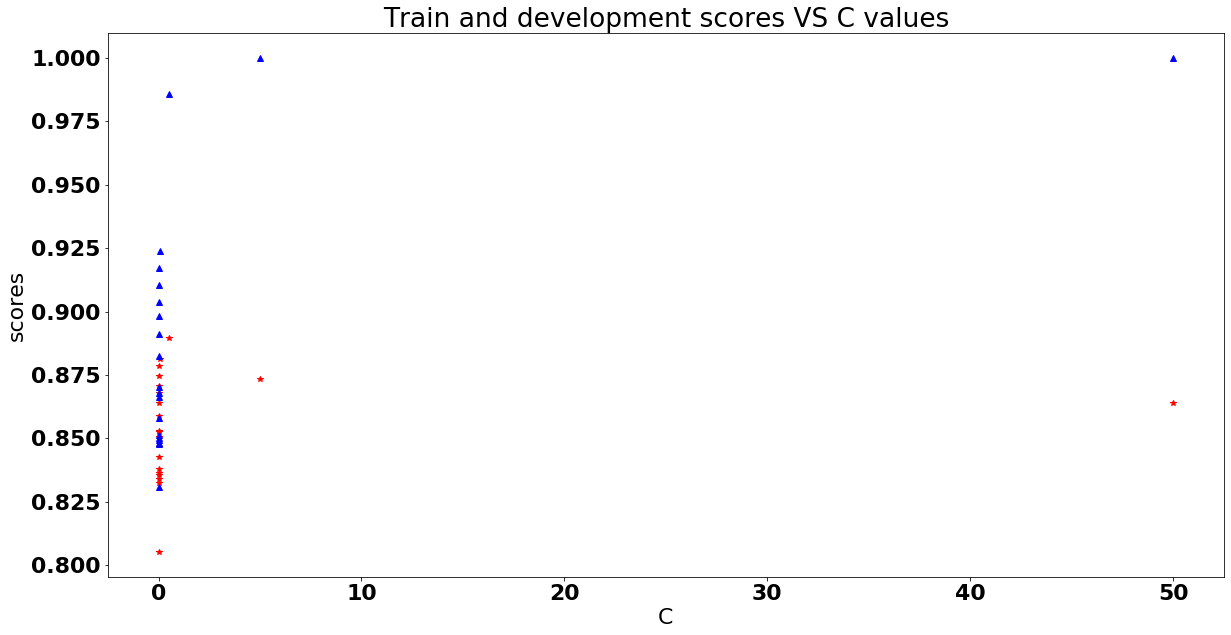

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
dev_scores = dev_score + dev_score_1 + dev_score_2
train_scores = train_score + train_score_1 + train_score_2 
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_scores, 'r*', cs, train_scores, 'b^')
plt.show()

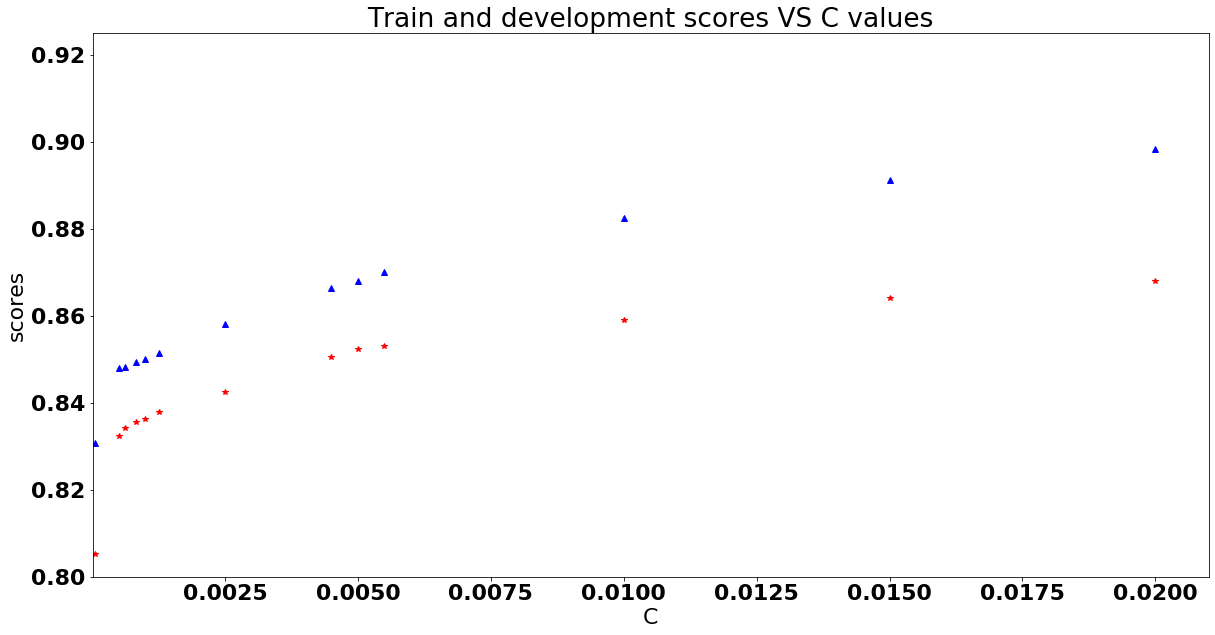

In [18]:
### zoom a part of the scores which are close to gather
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
plt.xlim(0.00001, 0.021)
plt.ylim(0.8,0.925)
dev_scores = dev_score + dev_score_1 + dev_score_2
train_scores = train_score + train_score_1 + train_score_2 
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_scores, 'r*', cs, train_scores, 'b^')
plt.show()


###  different ngrams

### the  result for countvectorizer for ngram = (1,1), now let's check the result for ngram = (1,2) , ngram = (2,2)

In [20]:
## feature extraction with tfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix_1 = vectorizer.fit_transform(texts)
print("shape=",feature_matrix.shape)
print("what did we get? ->", feature_matrix.__class__)

shape= (25000, 74849)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [21]:
print(feature_matrix_1)

  (0, 66562)	1
  (0, 44147)	1
  (0, 34585)	1
  (0, 46932)	1
  (0, 46680)	1
  (0, 66615)	1
  (0, 73733)	1
  (0, 44164)	1
  (0, 46050)	1
  (0, 6459)	1
  (0, 34683)	1
  (0, 66339)	1
  (0, 28547)	1
  (0, 2662)	1
  (0, 66925)	1
  (0, 9881)	1
  (0, 64641)	1
  (0, 41798)	1
  (0, 46957)	1
  (0, 72196)	1
  (0, 46916)	1
  (0, 21437)	1
  (0, 10357)	1
  (0, 57093)	1
  (0, 57715)	1
  :	:
  (24999, 37425)	1
  (24999, 45964)	1
  (24999, 23559)	1
  (24999, 11057)	1
  (24999, 2220)	1
  (24999, 73116)	1
  (24999, 68729)	1
  (24999, 14309)	1
  (24999, 55455)	1
  (24999, 6665)	1
  (24999, 54280)	1
  (24999, 55024)	1
  (24999, 47302)	1
  (24999, 29728)	1
  (24999, 50213)	1
  (24999, 16548)	1
  (24999, 18803)	1
  (24999, 4317)	1
  (24999, 61942)	1
  (24999, 13991)	1
  (24999, 67690)	1
  (24999, 41051)	1
  (24999, 7570)	1
  (24999, 62106)	1
  (24999, 14474)	1


In [22]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels=train_test_split(texts,labels,test_size=0.2)
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix_train_1=vectorizer.fit_transform(train_texts)
feature_matrix_dev_1=vectorizer.transform(dev_texts)

In [23]:
print(feature_matrix_train_1.shape)
print(feature_matrix_dev_1.shape)

(20000, 68339)
(5000, 68339)


In [24]:
dev_score_1 = []
train_score_1 =[]
import sklearn.metrics
for c in [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train_1, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev_1)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev_1, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train_1, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score_1.append(classifier.score(feature_matrix_dev_1, dev_labels))
    train_score_1.append(classifier.score(feature_matrix_train_1, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  5e-05
devlopment score is: 0.8284
train score is: 0.8424
['neg' 'neg' 'neg' ... 'pos' 'neg' 'neg']
confusion matrix is: [[2087  453]
 [ 405 2055]]
accuracy score is: 0.8284
----------------------------------------------------------------------
[LibLinear] for C =  0.0005
devlopment score is: 0.8624
train score is: 0.8959
['neg' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2172  368]
 [ 320 2140]]
accuracy score is: 0.8624
----------------------------------------------------------------------
[LibLinear] for C =  0.005
devlopment score is: 0.8836
train score is: 0.95665
['neg' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2247  293]
 [ 289 2171]]
accuracy score is: 0.8836
----------------------------------------------------------------------
[LibLinear] for C =  0.05
devlopment score is: 0.8738
train score is: 0.99625
['neg' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2229  311]
 [ 320 2140]]
accuracy score is: 0.8738
---------

/home/nafis/envs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 for C =  5
devlopment score is: 0.8562
train score is: 1.0
['pos' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2205  335]
 [ 384 2076]]
accuracy score is: 0.8562
----------------------------------------------------------------------
[LibLinear] for C =  50
devlopment score is: 0.8564
train score is: 1.0
['pos' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2208  332]
 [ 386 2074]]
accuracy score is: 0.8564
----------------------------------------------------------------------
[LibLinear] for C =  0.001
devlopment score is: 0.8726
train score is: 0.91355
['neg' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2207  333]
 [ 304 2156]]
accuracy score is: 0.8726
----------------------------------------------------------------------
[LibLinear] for C =  0.025
devlopment score is: 0.8768
train score is: 0.98965
['neg' 'neg' 'neg' ... 'pos' 'neg' 'pos']
confusion matrix is: [[2236  304]
 [ 312 2148]]
accuracy score is: 0.8768
---------------------------------

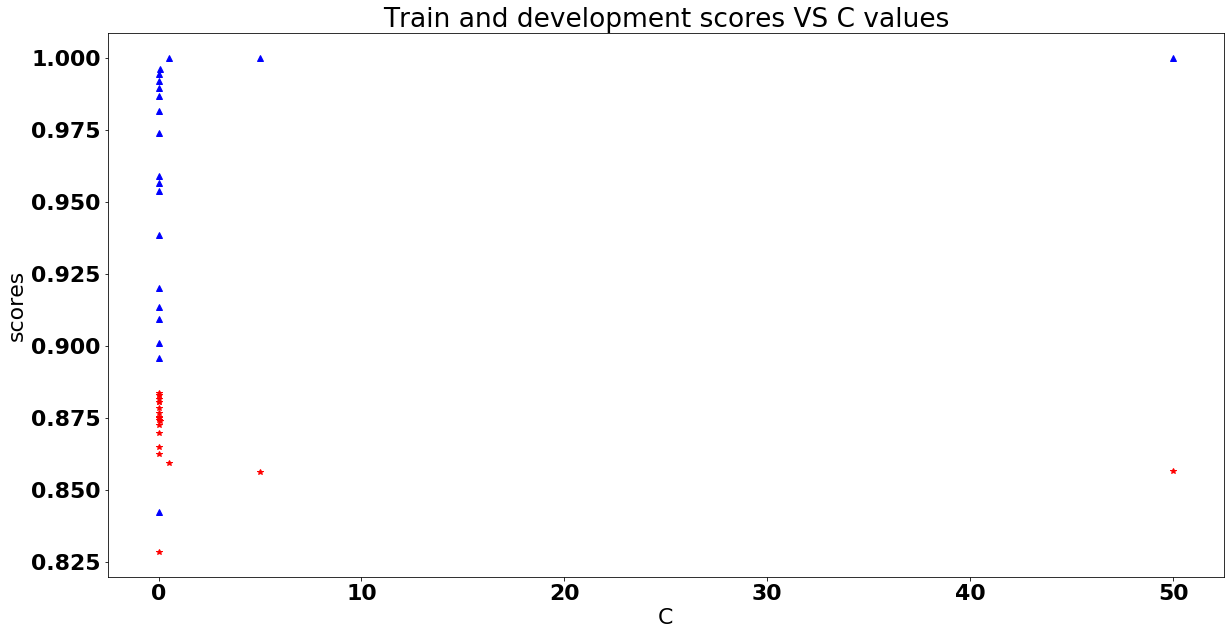

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_1, 'r*', cs, train_score_1, 'b^')
plt.show()

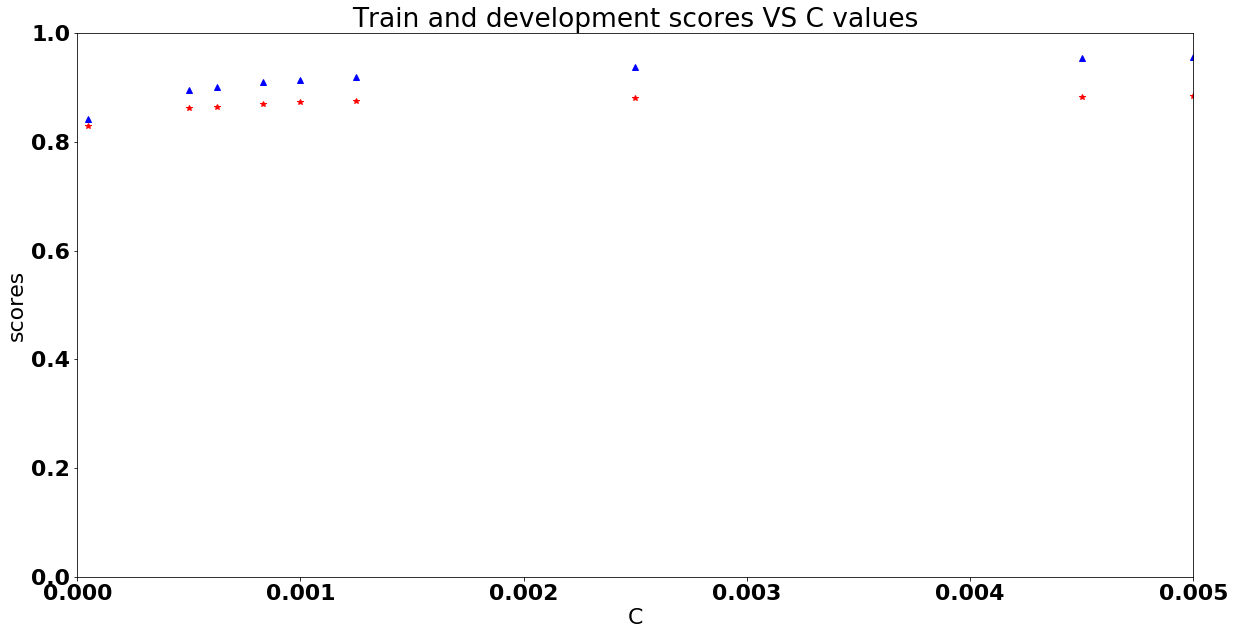

In [34]:
### zoom a part of the scores which are close to gather
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
plt.xlim(0, 0.005)
plt.ylim(0, 1)
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_1, 'r*', cs, train_score_1, 'b^')
plt.show()


### for ngram  = (1,2)

In [36]:
## feature extraction with tfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100000,binary=True,ngram_range=(1,2))
feature_matrix_2 = vectorizer.fit_transform(texts)
print("shape=",feature_matrix.shape)
print("what did we get? ->", feature_matrix.__class__)

shape= (25000, 100000)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [37]:
print(feature_matrix_2)

  (0, 86502)	1
  (0, 54171)	1
  (0, 42867)	1
  (0, 60479)	1
  (0, 57825)	1
  (0, 87133)	1
  (0, 98855)	1
  (0, 54648)	1
  (0, 56834)	1
  (0, 11324)	1
  (0, 44338)	1
  (0, 80869)	1
  (0, 34723)	1
  (0, 2527)	1
  (0, 87642)	1
  (0, 14430)	1
  (0, 78661)	1
  (0, 51905)	1
  (0, 60811)	1
  (0, 93626)	1
  (0, 60061)	1
  (0, 25508)	1
  (0, 15439)	1
  (0, 70369)	1
  (0, 70772)	1
  :	:
  (24999, 46278)	1
  (24999, 64798)	1
  (24999, 36351)	1
  (24999, 28096)	1
  (24999, 75995)	1
  (24999, 14742)	1
  (24999, 38363)	1
  (24999, 83367)	1
  (24999, 18972)	1
  (24999, 60904)	1
  (24999, 56442)	1
  (24999, 23608)	1
  (24999, 81468)	1
  (24999, 22788)	1
  (24999, 89981)	1
  (24999, 20963)	1
  (24999, 21416)	1
  (24999, 7110)	1
  (24999, 51437)	1
  (24999, 87760)	1
  (24999, 12852)	1
  (24999, 32155)	1
  (24999, 76115)	1
  (24999, 88076)	1
  (24999, 80448)	1


In [38]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels=train_test_split(texts,labels,test_size=0.2)
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,2))
feature_matrix_train_2=vectorizer.fit_transform(train_texts)
feature_matrix_dev_2=vectorizer.transform(dev_texts)

In [32]:
print(feature_matrix_train_2.shape)
print(feature_matrix_dev_2.shape)

(20000, 100000)
(5000, 100000)


In [39]:
dev_score_2 = []
train_score_2 =[]
import sklearn.metrics
for c in [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train_2, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev_2)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev_2, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train_2, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score_2.append(classifier.score(feature_matrix_dev_2, dev_labels))
    train_score_2.append(classifier.score(feature_matrix_train_2, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  5e-05
devlopment score is: 0.8452
train score is: 0.8652
['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2043  413]
 [ 361 2183]]
accuracy score is: 0.8452
----------------------------------------------------------------------
[LibLinear] for C =  0.0005
devlopment score is: 0.8792
train score is: 0.9353
['neg' 'pos' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2130  326]
 [ 278 2266]]
accuracy score is: 0.8792
----------------------------------------------------------------------
[LibLinear] for C =  0.005
devlopment score is: 0.8918
train score is: 0.99425
['neg' 'pos' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2171  285]
 [ 256 2288]]
accuracy score is: 0.8918
----------------------------------------------------------------------
[LibLinear] for C =  0.05
devlopment score is: 0.8862
train score is: 1.0
['neg' 'neg' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2163  293]
 [ 276 2268]]
accuracy score is: 0.8862
-------------

/home/nafis/envs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 for C =  5
devlopment score is: 0.8814
train score is: 1.0
['neg' 'neg' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2154  302]
 [ 291 2253]]
accuracy score is: 0.8814
----------------------------------------------------------------------
[LibLinear] for C =  50
devlopment score is: 0.8814
train score is: 1.0
['neg' 'neg' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2154  302]
 [ 291 2253]]
accuracy score is: 0.8814
----------------------------------------------------------------------
[LibLinear] for C =  0.001
devlopment score is: 0.8854
train score is: 0.95725
['neg' 'pos' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2151  305]
 [ 268 2276]]
accuracy score is: 0.8854
----------------------------------------------------------------------
[LibLinear] for C =  0.025
devlopment score is: 0.8902
train score is: 0.99995
['neg' 'neg' 'neg' ... 'pos' 'pos' 'neg']
confusion matrix is: [[2170  286]
 [ 263 2281]]
accuracy score is: 0.8902
---------------------------------

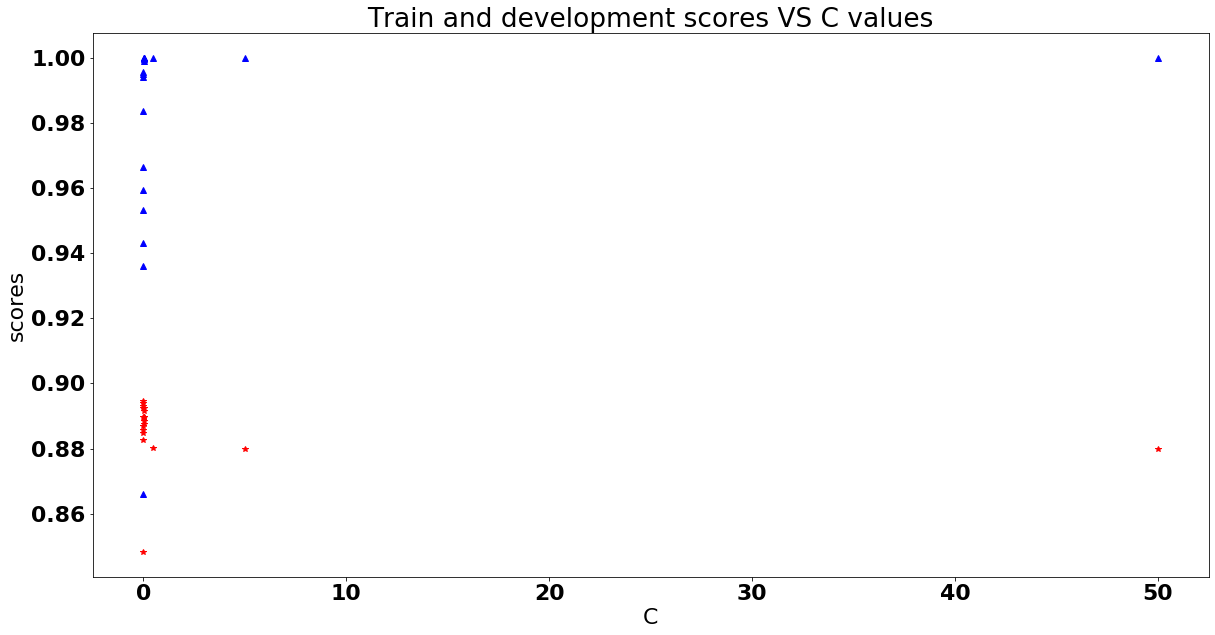

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score, 'r*', cs, train_score, 'b^')
plt.show()

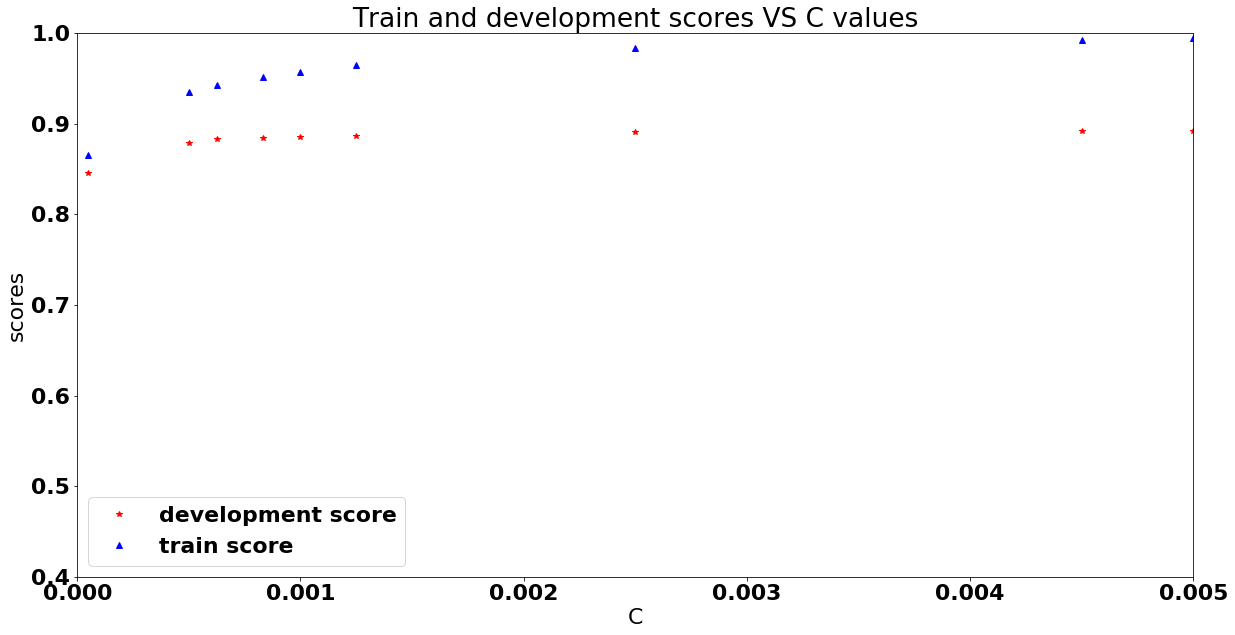

In [48]:
### zoom a part of the scores which are close to gather
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
plt.xlim(0.0, 0.005)
plt.ylim(0.4,1)
cs = [0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_2, 'r*', label = 'development score')
plt.plot(cs, train_score_2, 'b^', label = 'train score')
plt.legend()
plt.show()


#### lets try some other amount very close to zero like 0.000005, 0.00002, 0.00005,0.00007,0.0001

In [62]:
dev_score_22 = []
train_score_22 =[]
import sklearn.metrics
for c in [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train_2, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev_2)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev_2, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train_2, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score_22.append(classifier.score(feature_matrix_dev_2, dev_labels))
    train_score_22.append(classifier.score(feature_matrix_train_2, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  5e-06
devlopment score is: 0.7934
train score is: 0.81385
['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2074  382]
 [ 651 1893]]
accuracy score is: 0.7934
----------------------------------------------------------------------
[LibLinear] for C =  2e-05
devlopment score is: 0.822
train score is: 0.8412
['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2015  441]
 [ 449 2095]]
accuracy score is: 0.822
----------------------------------------------------------------------
[LibLinear] for C =  5e-05
devlopment score is: 0.8452
train score is: 0.8652
['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2043  413]
 [ 361 2183]]
accuracy score is: 0.8452
----------------------------------------------------------------------
[LibLinear] for C =  7e-05
devlopment score is: 0.8552
train score is: 0.8751
['neg' 'neg' 'neg' ... 'pos' 'pos' 'pos']
confusion matrix is: [[2064  392]
 [ 332 2212]]
accuracy score is: 0.8552
------------

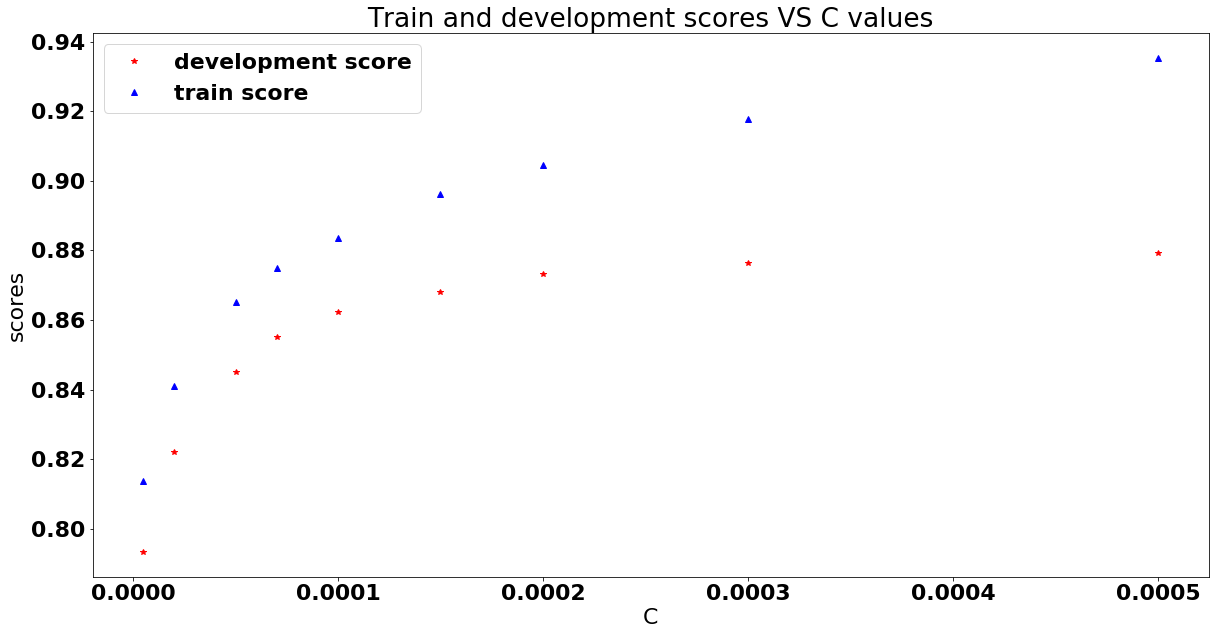

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
cs = [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]
plt.plot(cs, dev_score_22, 'r*', label = 'development score')
plt.plot(cs, train_score_22, 'b^', label = 'train score')
plt.legend()
plt.show()

### ngram = (2,2)

In [64]:
## feature extraction with tfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100000,binary=True,ngram_range=(2,2))
feature_matrix_3 = vectorizer.fit_transform(texts)
print("shape=",feature_matrix_3.shape)
print("what did we get? ->", feature_matrix_3.__class__)

shape= (25000, 100000)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [65]:
print(feature_matrix_3)

  (0, 86185)	1
  (0, 53471)	1
  (0, 42758)	1
  (0, 60511)	1
  (0, 59131)	1
  (0, 53871)	1
  (0, 56110)	1
  (0, 11916)	1
  (0, 44389)	1
  (0, 81140)	1
  (0, 33741)	1
  (0, 53550)	1
  (0, 57119)	1
  (0, 2594)	1
  (0, 87167)	1
  (0, 14802)	1
  (0, 44366)	1
  (0, 77005)	1
  (0, 51268)	1
  (0, 56379)	1
  (0, 60961)	1
  (0, 93413)	1
  (0, 44093)	1
  (0, 53297)	1
  (0, 14967)	1
  :	:
  (24999, 42219)	1
  (24999, 25239)	1
  (24999, 39033)	1
  (24999, 70653)	1
  (24999, 45646)	1
  (24999, 64604)	1
  (24999, 35248)	1
  (24999, 27096)	1
  (24999, 15166)	1
  (24999, 37365)	1
  (24999, 60812)	1
  (24999, 82152)	1
  (24999, 60825)	1
  (24999, 55630)	1
  (24999, 23003)	1
  (24999, 79906)	1
  (24999, 22239)	1
  (24999, 20653)	1
  (24999, 21095)	1
  (24999, 7531)	1
  (24999, 87294)	1
  (24999, 31273)	1
  (24999, 12681)	1
  (24999, 87615)	1
  (24999, 78664)	1


In [66]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels=train_test_split(texts,labels,test_size=0.2)
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(2,2))
feature_matrix_train_3=vectorizer.fit_transform(train_texts)
feature_matrix_dev_3=vectorizer.transform(dev_texts)

In [67]:
print(feature_matrix_train_3.shape)
print(feature_matrix_dev_3.shape)

(20000, 100000)
(5000, 100000)


In [70]:
dev_score_3 = []
train_score_3 =[]
import sklearn.metrics
for c in [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train_3, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev_3)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev_3, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train_3, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score_3.append(classifier.score(feature_matrix_dev_3, dev_labels))
    train_score_3.append(classifier.score(feature_matrix_train_3, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  5e-06
devlopment score is: 0.7662
train score is: 0.78025
['pos' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2030  458]
 [ 711 1801]]
accuracy score is: 0.7662
----------------------------------------------------------------------
[LibLinear] for C =  2e-05
devlopment score is: 0.778
train score is: 0.7979
['pos' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[1972  516]
 [ 594 1918]]
accuracy score is: 0.778
----------------------------------------------------------------------
[LibLinear] for C =  5e-05
devlopment score is: 0.795
train score is: 0.81945
['pos' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[1976  512]
 [ 513 1999]]
accuracy score is: 0.795
----------------------------------------------------------------------
[LibLinear] for C =  7e-05
devlopment score is: 0.803
train score is: 0.82955
['pos' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[1978  510]
 [ 475 2037]]
accuracy score is: 0.803
--------------

/home/nafis/envs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 for C =  5
devlopment score is: 0.867
train score is: 1.0
['neg' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2157  331]
 [ 334 2178]]
accuracy score is: 0.867
----------------------------------------------------------------------
[LibLinear] for C =  50
devlopment score is: 0.8666
train score is: 1.0
['neg' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2156  332]
 [ 335 2177]]
accuracy score is: 0.8666
----------------------------------------------------------------------
[LibLinear] for C =  0.001
devlopment score is: 0.8638
train score is: 0.9387
['pos' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2118  370]
 [ 311 2201]]
accuracy score is: 0.8638
----------------------------------------------------------------------
[LibLinear] for C =  0.025
devlopment score is: 0.8774
train score is: 0.99985
['neg' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2184  304]
 [ 309 2203]]
accuracy score is: 0.8774
------------------------------------

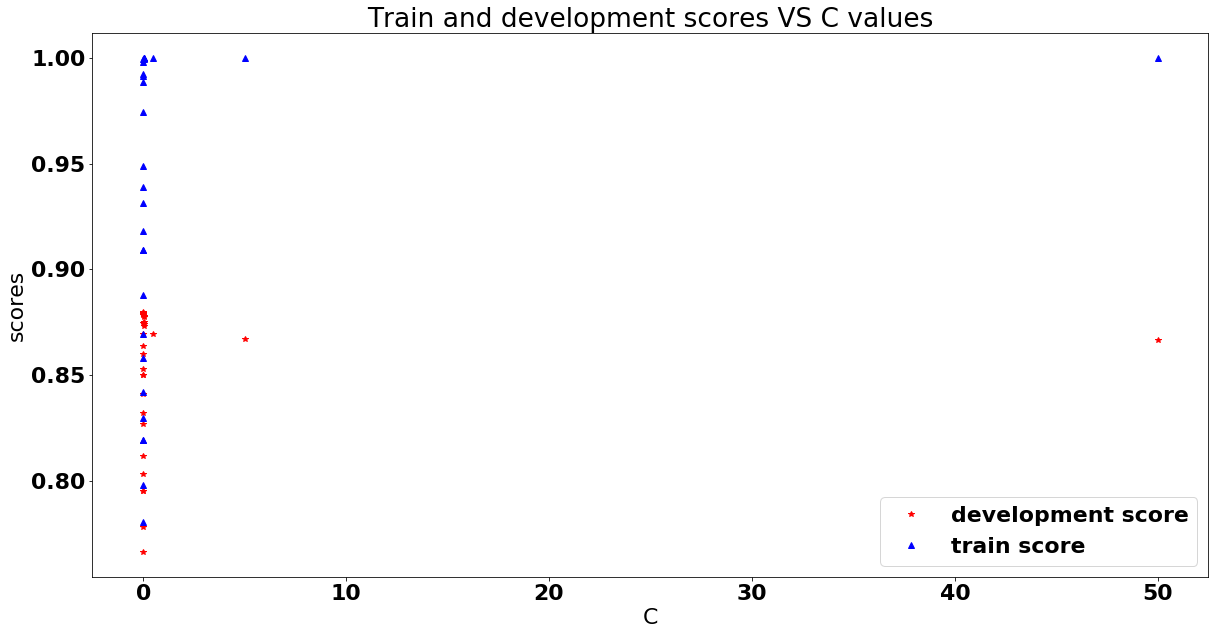

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
cs = [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_3, 'r*', label = 'development score')
plt.plot(cs, train_score_3, 'b^', label = 'train score')
plt.legend()
plt.show()

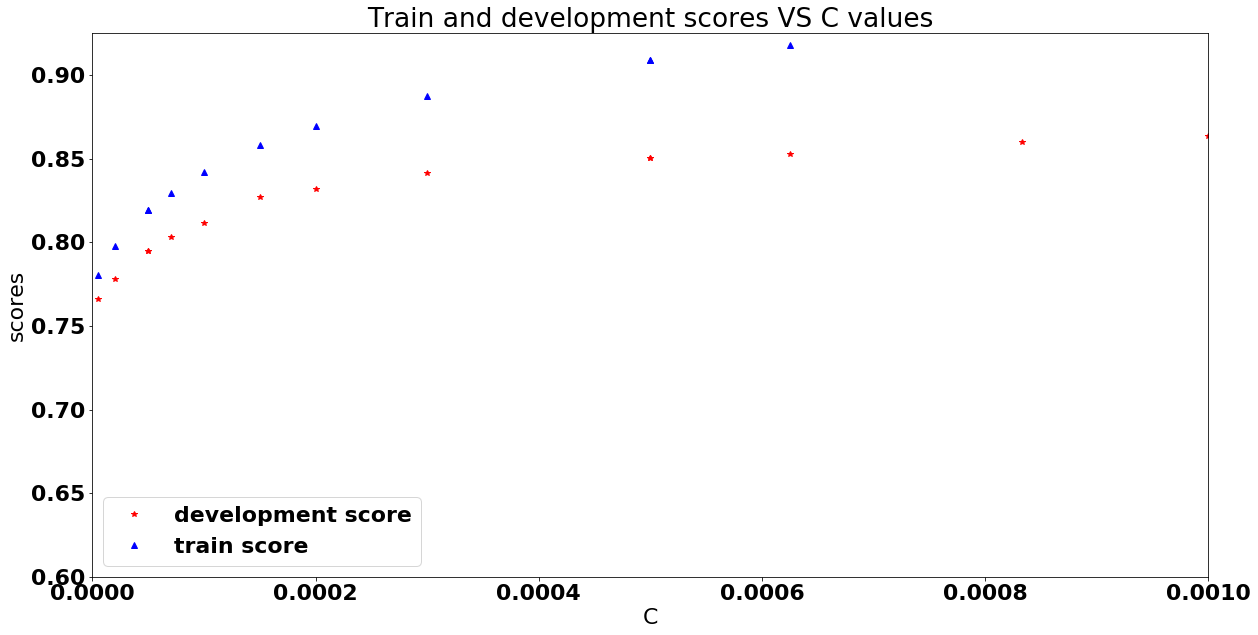

In [75]:
### zoom a part of the scores which are close to gather
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
plt.xlim(0.0, 0.001)
plt.ylim(0.6,0.925)
cs = [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_3, 'r*', label = 'development score')
plt.plot(cs, train_score_3, 'b^', label = 'train score')
plt.legend()
plt.show()


### ngram = (1,3)

In [76]:
## feature extraction with tfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100000,binary=True,ngram_range=(1,3))
feature_matrix_4 = vectorizer.fit_transform(texts)
print("shape=",feature_matrix_4.shape)
print("what did we get? ->", feature_matrix_4.__class__)

shape= (25000, 100000)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [77]:
print(feature_matrix_4)

  (0, 84596)	1
  (0, 51762)	1
  (0, 40181)	1
  (0, 58838)	1
  (0, 55634)	1
  (0, 85722)	1
  (0, 98627)	1
  (0, 52552)	1
  (0, 54574)	1
  (0, 11125)	1
  (0, 42262)	1
  (0, 76929)	1
  (0, 32112)	1
  (0, 2205)	1
  (0, 86240)	1
  (0, 13681)	1
  (0, 74493)	1
  (0, 49830)	1
  (0, 59234)	1
  (0, 92724)	1
  (0, 58243)	1
  (0, 23427)	1
  (0, 14927)	1
  (0, 67145)	1
  (0, 67492)	1
  :	:
  (24999, 41872)	1
  (24999, 72364)	1
  (24999, 14312)	1
  (24999, 35636)	1
  (24999, 80435)	1
  (24999, 17903)	1
  (24999, 59321)	1
  (24999, 54176)	1
  (24999, 21769)	1
  (24999, 77664)	1
  (24999, 21006)	1
  (24999, 89635)	1
  (24999, 19510)	1
  (24999, 19822)	1
  (24999, 52546)	1
  (24999, 8007)	1
  (24999, 6984)	1
  (24999, 6985)	1
  (24999, 44720)	1
  (24999, 51873)	1
  (24999, 12498)	1
  (24999, 83516)	1
  (24999, 6069)	1
  (24999, 86680)	1
  (24999, 98524)	1


In [79]:
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels=train_test_split(texts,labels,test_size=0.2)
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,3))
feature_matrix_train_4=vectorizer.fit_transform(train_texts)
feature_matrix_dev_4=vectorizer.transform(dev_texts)

In [80]:
print(feature_matrix_train_4.shape)
print(feature_matrix_dev_4.shape)

(20000, 100000)
(5000, 100000)


In [82]:
dev_score_4 = []
train_score_4 =[]
import sklearn.metrics
for c in [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015] + [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]:
    classifier=sklearn.svm.LinearSVC(C= c,verbose=1)
    classifier.fit(feature_matrix_train_4, train_labels)
    predictions_dev=classifier.predict(feature_matrix_dev_4)
    print(' for C = ', c)
    print('devlopment score is:', classifier.score(feature_matrix_dev_4, dev_labels))
    print('train score is:', classifier.score(feature_matrix_train_4, train_labels))
    print(predictions_dev)
    print('confusion matrix is:', sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
    print('accuracy score is:',sklearn.metrics.accuracy_score(dev_labels,predictions_dev))
    dev_score_4.append(classifier.score(feature_matrix_dev_4, dev_labels))
    train_score_4.append(classifier.score(feature_matrix_train_4, train_labels))
    print('----------------------------------------------------------------------')

[LibLinear] for C =  5e-06
devlopment score is: 0.8044
train score is: 0.8167
['neg' 'neg' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2095  363]
 [ 615 1927]]
accuracy score is: 0.8044
----------------------------------------------------------------------
[LibLinear] for C =  2e-05
devlopment score is: 0.8334
train score is: 0.8445
['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2044  414]
 [ 419 2123]]
accuracy score is: 0.8334
----------------------------------------------------------------------
[LibLinear] for C =  5e-05
devlopment score is: 0.8496
train score is: 0.86925
['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2051  407]
 [ 345 2197]]
accuracy score is: 0.8496
----------------------------------------------------------------------
[LibLinear] for C =  7e-05
devlopment score is: 0.857
train score is: 0.87835
['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2066  392]
 [ 323 2219]]
accuracy score is: 0.857
-----------

/home/nafis/envs/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 for C =  0.5
devlopment score is: 0.88
train score is: 1.0
['neg' 'pos' 'pos' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2152  306]
 [ 294 2248]]
accuracy score is: 0.88
----------------------------------------------------------------------
[LibLinear] for C =  5
devlopment score is: 0.8792
train score is: 1.0
['neg' 'pos' 'pos' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2148  310]
 [ 294 2248]]
accuracy score is: 0.8792
----------------------------------------------------------------------
[LibLinear] for C =  50
devlopment score is: 0.8792
train score is: 1.0
['neg' 'pos' 'pos' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2148  310]
 [ 294 2248]]
accuracy score is: 0.8792
----------------------------------------------------------------------
[LibLinear] for C =  0.001
devlopment score is: 0.8866
train score is: 0.96425
['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos']
confusion matrix is: [[2152  306]
 [ 261 2281]]
accuracy score is: 0.8866
-------------------------------------------

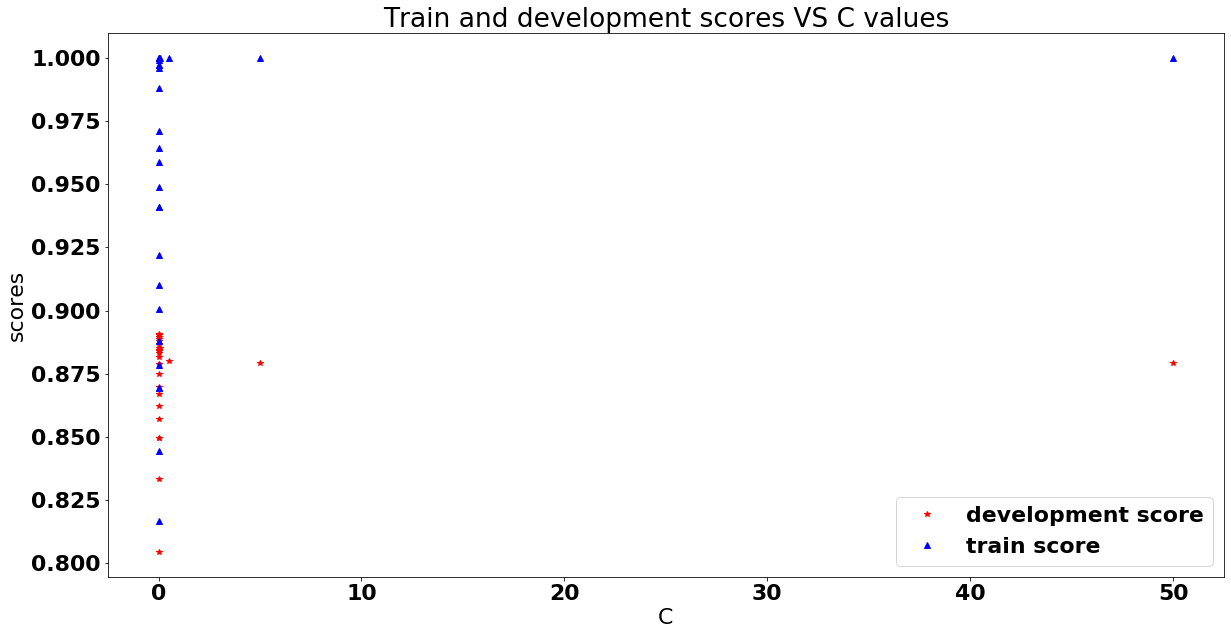

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
cs = [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_4, 'r*', label = 'development score')
plt.plot(cs, train_score_4, 'b^', label = 'train score')
plt.legend()
plt.show()

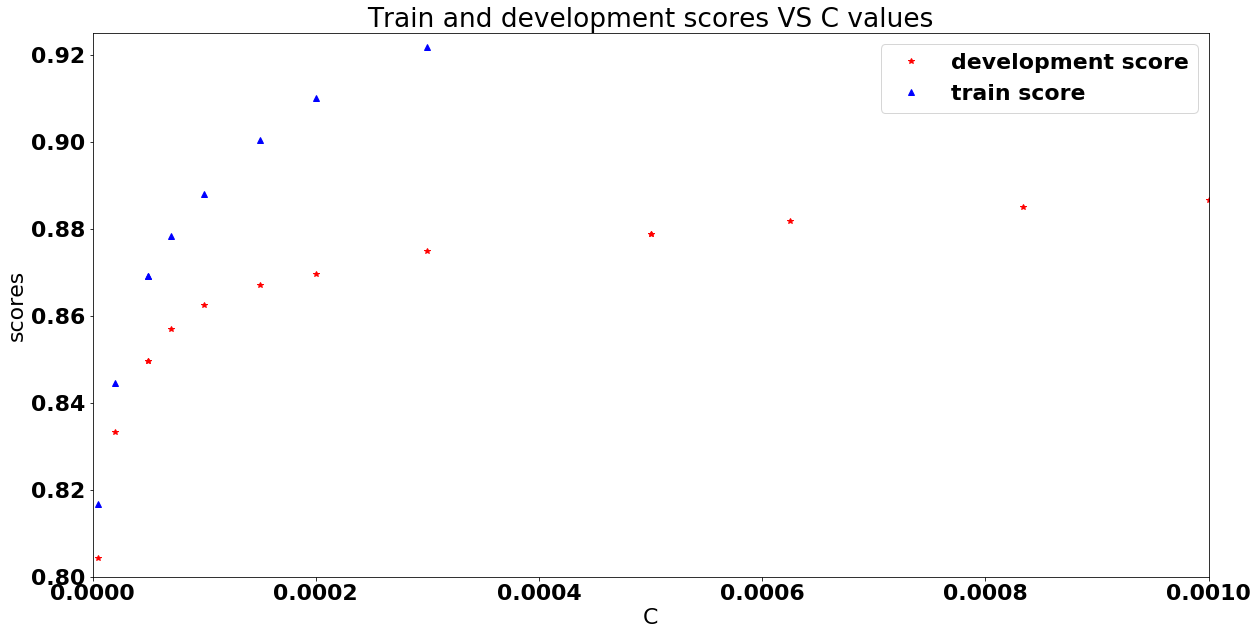

In [87]:
### zoom a part of the scores which are close to gather
plt.figure(figsize=(20,10))
# matplotlib.rc('xtick', labelsize=15) 
# matplotlib.rc('ytick', labelsize= 15)
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.title('Train and development scores VS C values')
plt.xlabel('C')
plt.ylabel('scores')
plt.xlim(0.0, 0.001)
plt.ylim(0.8,0.925)
cs = [0.000005, 0.00002, 0.00005,0.00007,0.0001,0.00015,0.0002,0.0003,0.0005]+[0.00005, 0.0005, 0.005, 0.05, 0.5, 5, 50] + [0.005/5,0.005*5] + [0.005*2 , 0.005*4, 0.005*6, .005*8, 0.015]+ [0.005/2 , 0.005/4, 0.005/6, .005/8, 0.0045,0.0055 ]
plt.plot(cs, dev_score_4, 'r*', label = 'development score')
plt.plot(cs, train_score_4, 'b^', label = 'train score')
plt.legend()
plt.show()


As it can be seen, when the ngram_range is increased the optimum amount of C change to be smaller

### Question 3. language recognition

At first all the data is read from the files, and the data of development and train mixed up and shuffled then it was splitted and then the model was applied

In [17]:
# en_test = pd.read_csv("intro-to-nlp/language-identification/en_test.txt",header=None,error_bad_lines=False)
en_test = pd.read_csv("intro-to-nlp/language-identification/en_test.txt",names=["Text"],sep="delimiter")
en_test["Label"] = "en"
en_train = pd.read_csv("intro-to-nlp/language-identification/en_train.txt",names=["Text"],sep="delimiter")
en_train["Label"] = "en"
en_devel = pd.read_csv("intro-to-nlp/language-identification/en_devel.txt",names=["Text"],sep="delimiter")
en_devel["Label"] = "en"

/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [18]:
print("en:\n",en_test.shape,en_train.shape,en_devel.shape)

en:
 (1000, 2) (1000, 2) (1000, 2)


In [19]:
en_test.head()

,Text,Label
0,But I had my cat spayed through their reduced/...,en
1,"I'm watching for some good vacation days, also...",en
2,I did not have a good experience w/ Dr. Ghasse...,en
3,I don't think it will be hard to keep his weig...,en
4,"The store manager, Jim Smith, made an excellen...",en


In [20]:
# An example of a sentence
en_test.iloc[999,0]

'He allegedly was at one or more meetings in the Summer of 2001 in Pakistan at which KSM and Sufaat were present.'

In [21]:
en_train.head()

,Text,Label
0,"Since September 11, Pakistan has been repeated...",en
1,07/17/2000 04:28 PM,en
2,Set up last month to centralize merchant asset...,en
3,Justin,en
4,This is however a very busy shop but there are...,en


In [22]:
en_devel.head()


,Text,Label
0,Let me know if you have any questions.,en
1,Obudu cattle ranch.,en
2,Used as a help for horses that are quite stron...,en
3,See below.,en
4,"Its projected demand, boosted by a huge rise i...",en


In [23]:
es_test = pd.read_csv("intro-to-nlp/language-identification/es_test.txt",names=["Text"],sep="delimiter")
es_test["Label"] = "es"
es_train = pd.read_csv("intro-to-nlp/language-identification/es_train.txt",names=["Text"],sep="delimiter")
es_train["Label"] = "es"
es_devel = pd.read_csv("intro-to-nlp/language-identification/es_devel.txt",names=["Text"],sep="delimiter")
es_devel["Label"] = "es"

et_test = pd.read_csv("intro-to-nlp/language-identification/et_test.txt",names=["Text"],sep="delimiter")
et_test["Label"] = "et"
et_train = pd.read_csv("intro-to-nlp/language-identification/et_train.txt",names=["Text"],sep="delimiter")
et_train["Label"] = "et"
et_devel = pd.read_csv("intro-to-nlp/language-identification/et_devel.txt",names=["Text"],sep="delimiter")
et_devel["Label"] = "et"

fi_test = pd.read_csv("intro-to-nlp/language-identification/fi_test.txt",names=["Text"],sep="delimiter")
fi_test["Label"] = "fi"
fi_train = pd.read_csv("intro-to-nlp/language-identification/fi_train.txt",names=["Text"],sep="delimiter")
fi_train["Label"] = "fi"
fi_devel = pd.read_csv("intro-to-nlp/language-identification/fi_devel.txt",names=["Text"],sep="delimiter")
fi_devel["Label"] = "fi"

pt_test = pd.read_csv("intro-to-nlp/language-identification/pt_test.txt",names=["Text"],sep="delimiter")
pt_test["Label"] = "pt"
pt_train = pd.read_csv("intro-to-nlp/language-identification/pt_train.txt",names=["Text"],sep="delimiter")
pt_train["Label"] = "pt"
pt_devel = pd.read_csv("intro-to-nlp/language-identification/pt_devel.txt",names=["Text"],sep="delimiter")
pt_devel["Label"] = "pt"

/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nafis/envs/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex);

In [24]:
print("es:\n",es_test.shape,es_train.shape,es_devel.shape)
print("et:\n",et_test.shape,et_train.shape,et_devel.shape)
print("fi:\n",fi_test.shape,fi_train.shape,fi_devel.shape)
print("pt:\n",pt_test.shape,pt_train.shape,pt_devel.shape)

es:
 (1000, 2) (1000, 2) (1000, 2)
et:
 (1000, 2) (1000, 2) (1000, 2)
fi:
 (1000, 2) (1000, 2) (1000, 2)
pt:
 (1000, 2) (1000, 2) (1000, 2)


In [25]:
# Merging the test dataframes
data_test = pd.concat([en_test,es_test,et_test,fi_test,pt_test],axis=0)
data_test = data_test.sample(frac=1).reset_index(drop=True)

# Merging the train dataframes
data_train = pd.concat([en_train,es_train,et_train,fi_train,pt_train],axis=0)
data_train = data_train.sample(frac=1).reset_index(drop=True)

# Merging the devel dataframes
data_devel = pd.concat([en_devel,es_devel,et_devel,fi_devel,pt_devel],axis=0)
data_devel = data_devel.sample(frac=1).reset_index(drop=True)

In [26]:
data_test.head()

,Text,Label
0,As questões mais complicadas estão ainda sobre...,pt
1,"Kaikki saivat ranne-, nilkka- ja kaulakorun ja...",fi
2,Unfortunalty my husband and I had to put our 1...,en
3,Seega lisandub Tallinnale“ provintsis” veel 60...,et
4,"ML: Oluline ei ole omandivorm, vaid ülikooli t...",et


In [27]:
data_train.tail()

,Text,Label
4995,Las ideas de Mao se consolidarían como ideolog...,es
4996,We are from Virginia and just moved here a yea...,en
4997,To promote one of the most trivial interests w...,en
4998,Panga presidendi funktsioonid on väga rangetes...,et
4999,I've read the materials you sent and agree we ...,en


In [28]:
data_devel[101:106]

,Text,Label
101,"Sunshine Coast, British Columbia, Canada",en
102,"Emma is fine, too- very well!!",en
103,E até pode não saber quem é...,pt
104,The mangers also play a classic movies on Sund...,en
105,"I chalked it up to possible nerve damage, beca...",en


In [72]:
# Creating X and y matrices
dev_train_data = (pd.concat([data_train , data_devel])).sample(frac=1).reset_index(drop=True)  # shuffle the datas 
texts = dev_train_data.drop(["Label"],axis=1)
texts = texts.to_numpy().tolist()
labels = dev_train_data["Label"]
labels = labels.to_numpy().tolist()

test_texts = data_test.drop(["Label"],axis=1)
test_labels = data_test["Label"]

In [79]:
import numpy as np
texts = [i for i in texts ]
texts[:12]

['Após fazer uma única volta rápida, Schumacher emprestou seu carro para o companheiro Jos Verstappen, que havia rodado em os treinos de a manhã.',
 'Paraku ei suuda nad uskuda, et ajal, mil nende emad võitlesid õiguse eest tööl käia, on meie emad ja vanaemad alati hirmsasti rabanud.',
 'Is it safe to go to Rotarua, since the earthquakes?',
 'Thus kaoshikii is a blossoming of the microcosm(unit being) in its attempt to attain a link with the Macrocosm(Cosmic Consciousness).',
 'Ayudó a fundar lo que ahora es el Colegio Universitario del de el Estado Libre de Orange y el Seminario Stellenbosch.',
 'allerginen tietokoneille',
 'Y entre 1960-70 tuvieron problemas por la caza furtiva de caribúes( cinco innu fueron multados con 500 $).',
 'Los informes que revelaban el colaboracionismo de Marcos con los nipones durante la invasión de su país fueron olvidados.',
 'O gol de a vitória flamenguista foi marcado a os 20 min de o segundo tempo.',
 'Provinssin pääkaupunki on Palu.',
 'Segundo o pre

In [80]:
# Splitting the data
from sklearn.model_selection import train_test_split

train_texts, dev_texts, train_labels, dev_labels = train_test_split(texts,labels,test_size=0.2)
len(train_texts), len(dev_texts)

(8000, 2000)

## classiffier

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix=vectorizer.fit_transform(texts)
print("shape=",feature_matrix.shape)
print("what did we get? ->", feature_matrix.__class__)

shape= (10000, 46875)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [95]:
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,1))
feature_matrix_train=vectorizer.fit_transform(train_texts)
feature_matrix_dev=vectorizer.transform(dev_texts)

import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)
classifier.fit(feature_matrix_train, train_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [96]:
print("DEV",classifier.score(feature_matrix_dev, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train, train_labels))

DEV 0.886
TRAIN 0.896125


In [97]:
import sklearn.metrics
predictions_dev=classifier.predict(feature_matrix_dev)
print(predictions_dev)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev))

['pt' 'pt' 'et' ... 'fi' 'es' 'pt']
[[323   0  59   2   0]
 [  1 399   5   1   4]
 [  0   0 359  43   0]
 [  2   1  59 356   0]
 [  1   0  47   3 335]]
0.886


### Question 4. toying around with featues


#### analyser = 'word ' , ngram _range = (1,2)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,2))
feature_matrix_2=vectorizer.fit_transform(texts)
print("shape=",feature_matrix_2.shape)
print("what did we get? ->", feature_matrix_2.__class__)

shape= (10000, 100000)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [99]:
vectorizer=CountVectorizer(max_features=100000,binary=True,ngram_range=(1,2))
feature_matrix_train_2=vectorizer.fit_transform(train_texts)
feature_matrix_dev_2=vectorizer.transform(dev_texts)

import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)  ## with smaller C 
classifier.fit(feature_matrix_train_2, train_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [100]:
print("DEV",classifier.score(feature_matrix_dev_2, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train_2, train_labels))

DEV 0.885
TRAIN 0.9005


In [101]:
## prediction score and confusion matrix
import sklearn.metrics
predictions_dev_2=classifier.predict(feature_matrix_dev_2)
print(predictions_dev_2)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev_2))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev_2))

['pt' 'pt' 'et' ... 'fi' 'es' 'pt']
[[323   0  59   2   0]
 [  1 398   5   1   5]
 [  0   0 358  44   0]
 [  2   1  59 356   0]
 [  1   0  47   3 335]]
0.885


### lets consider character instead of word as an analyser = 'char_wb'

#### analyzer='char_wb',ngram_range=(2,2)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=100000,binary=True,analyzer='char_wb',ngram_range=(2,2))
feature_matrix_3=vectorizer.fit_transform(texts)
print("shape=",feature_matrix_3.shape)
print("what did we get? ->", feature_matrix_3.__class__)

shape= (10000, 2762)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [109]:
vectorizer=CountVectorizer(max_features=100000,binary=True,analyzer='char_wb',ngram_range=(2,2))
feature_matrix_train_3=vectorizer.fit_transform(train_texts)
feature_matrix_dev_3=vectorizer.transform(dev_texts)

import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)  
classifier.fit(feature_matrix_train_3, train_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [110]:
print("DEV",classifier.score(feature_matrix_dev_3, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train_3, train_labels))

DEV 0.966
TRAIN 0.972375


In [111]:
## prediction score and confusion matrix
import sklearn.metrics
predictions_dev_3=classifier.predict(feature_matrix_dev_3)
print(predictions_dev_3)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev_3))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev_3))

['pt' 'pt' 'en' ... 'fi' 'es' 'pt']
[[371   2   7   0   4]
 [  3 400   2   1   4]
 [  6   1 384  10   1]
 [  3   0   6 409   0]
 [ 11   3   2   2 368]]
0.966


#### analyzer='char_wb',ngram_range=(2,3)

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(max_features=100000,binary=True,analyzer='char_wb',ngram_range=(2,3))
feature_matrix_4=vectorizer.fit_transform(texts)
print("shape=",feature_matrix_4.shape)
print("what did we get? ->", feature_matrix_4.__class__)

shape= (10000, 22225)
what did we get? -> <class 'scipy.sparse.csr.csr_matrix'>


In [113]:
vectorizer=CountVectorizer(max_features=100000,binary=True,analyzer='char_wb',ngram_range=(2,3))
feature_matrix_train_4=vectorizer.fit_transform(train_texts)
feature_matrix_dev_4=vectorizer.transform(dev_texts)

import sklearn.svm
classifier=sklearn.svm.LinearSVC(C=0.0005,verbose=1)  
classifier.fit(feature_matrix_train_4, train_labels)

[LibLinear]

LinearSVC(C=0.0005, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=1)

In [114]:
print("DEV",classifier.score(feature_matrix_dev_4, dev_labels))
print("TRAIN",classifier.score(feature_matrix_train_4, train_labels))

DEV 0.9795
TRAIN 0.979625


In [115]:
## prediction score and confusion matrix
import sklearn.metrics
predictions_dev_4=classifier.predict(feature_matrix_dev_4)
print(predictions_dev_4)
print(sklearn.metrics.confusion_matrix(dev_labels,predictions_dev_4))
print(sklearn.metrics.accuracy_score(dev_labels,predictions_dev_4))

['pt' 'pt' 'en' ... 'fi' 'es' 'pt']
[[381   0   1   0   2]
 [  1 406   1   1   1]
 [  5   1 390   6   0]
 [  4   0   4 410   0]
 [  9   3   0   2 372]]
0.9795


As per the above result, the score of the train, development and predicion significantly increases when we change the analyser from the word to character. Also with increasing the ngram the scores show increases. 

# Q5:

In [14]:
# this is how you read a file of this kind
# one item per line, empty lines between sequences
from collections import namedtuple
#Same as tuple but the fields are named for convenience
#this says we have four fields
OneWord=namedtuple("OneWord",["id","form","lemma","upos"])
def read_ud(f_name):
    """Yield complete sentences"""
    current_sentence=[] #This will be a list of (word,label), which we accumulate for each sentence
    with open(f_name) as f:
        for line in f:
            line=line.strip() #drop whitespace
            if line.startswith("#"): #let's not worry about these for the time being
                continue
            if not line: #sentence break
                if current_sentence: #if we gathered a sentence, we should yield it, because a new starts
                    yield current_sentence #much like return, but continues past this line once the element has been consumed
                    current_sentence=[] #...and start a new one
                continue
            #if we made it here, we are on a normal line
            columns=line.split() #an actual word line
            assert len(columns[:4])==4 #we should have four columns, looking at the data
            current_sentence.append(OneWord(*columns[:4]))
        else: #for ... else -> the else part is executed once, when "for" runs out of elements
            if current_sentence: #yield also the last one!
                yield current_sentence
#Now just read the data in
sentences_train=list(read_ud("./zh_gsdsimp-ud-train.conllu"))
sentences_dev=list(read_ud("./zh_gsdsimp-ud-dev.conllu"))
print("First three sentences")
for sent in sentences_dev[:3]:
    print(sent)
    print()

def generate_sentence_features(sent):
    #Given a sentence as a list of (word, label) pairs
    #generate the features for every word
    #The result should be a list of same length as the sentence
    #Each item is a dictionary of {"feature name"->feature value} mappings, holding all features of the word at that position
    sent_features=[] #this will be the result
    for one_word in sent:
        #We do nothing with label
        #it just happens to be around
        word_features={}
        word_features[one_word.form]=1 #the word itself is a feature
        sent_features.append(word_features)
    return sent_features
print(generate_sentence_features(sentences_dev[2])  )

#...now we can generate the training examples
def prep_data(sentences):
    all_labels=[] #here we gather labels for all words in all sentences
    all_features=[] #here we gather features for all words in all sentences
    for sentence in sentences:
        sent_features=generate_sentence_features(sentence)
        assert len(sent_features)==len(sentence)
        #Now we can get, for every position its label and its features
        for one_word,features in zip(sentence,sent_features):
            all_labels.append(one_word.upos) #label
            all_features.append(features)         #and features to go with it
    return all_labels, all_features
train_labels,train_features=prep_data(sentences_train)
dev_labels,dev_features=prep_data(sentences_dev)

from sklearn.feature_extraction import DictVectorizer
vectorizer=DictVectorizer()
vectorizer.fit(train_features)
print("Vectorizer vocab size:",len(vectorizer.vocabulary_))
feature_vectors_train=vectorizer.transform(train_features)
feature_vectors_dev=vectorizer.transform(dev_features)
print("Train shape",feature_vectors_train.shape)
print("Dev shape",feature_vectors_dev.shape)

classifier=sklearn.svm.LinearSVC(C=0.05,verbose=1)
classifier.fit(feature_vectors_train, train_labels)

# Let us try to look at some predictions
sentence_data=[OneWord("XXX",w,"XXX","XXX") for w in lst] #we need to fake this a bit
_,sentence_features=prep_data([sentence_data])
sentence_vectors=vectorizer.transform(sentence_features)
predictions=classifier.predict(sentence_vectors)
for word,label in zip(lst,predictions):
    print(word,label)